***
created by Farah Rabie (fr2007@hw.ac.uk)
***

<p>In this notebook, we explore how to apply <em>KMeans clustering</em>, an unsupervised Machine Learning algorithm, to well log data. The goal is to group similar sections of well log data, allowing us to uncover patterns or clusters that may correlate with different lithologies. We will follow these steps:</p>
<ul>
    <li><em>Processing the Data</em> – Cleaning and standardising the well log data.</li>
    <li><em>KMeans Clustering</em> – Applying the KMeans algorithm to categorise the well data into meaningful clusters.</li>
    <li><em>Visualising the Results</em> – Visualising the clusters and comparing them with true lithology.</li>
</ul>

<p>By the end of this notebook, we will have a clear view of how KMeans can be used to classify well log data.

[Here](https://github.com/farah-rabie/GeosciencePlusAI/blob/main/Video%20Tutorials/Tutorial-2-_KMeans-Clustering_Video-1.mp4) is the first video tutorial on data processing. The second video tutorial covers KMeans Clustering.</p>

##### I$\,\,\,\,\,\,$Data Processing for Clustering

<p>We start off with processing the well log data. The <code>DataProcessing</code> class is imported from the <code>Lib.ClusteringFunctions</code> module and instantiated as <code>DataProcess.</code> This allows us to access its methods for processing, scaling, and visualising well data.</p> 

In [1]:
from Lib.ClusteringFunctions import DataProcessing
DataProcess = DataProcessing()

<p>The <code>process_well_data</code> method loads multiple well log datasets and performs various steps to clean the data, including handling missing values and applying logarithmic transformations to certain columns (specifically, KLOGH and RT). The <code>selected columns</code> for processing include key geophysical properties, with the LITHOLOGY column included for later use.</p>

<p>If <code>train_data</code> is set to <code>True</code>, the data is considered <strong><span style="color: blue;">training</span></strong> data. In this case, the data from all wells is combined into a single DataFrame, and scaling parameters are computed for the numerical columns, excluding the LITHOLOGY column. In this process, the descriptive statistics and the first few rows of the processed data can be displayed to give a snapshot of the cleaned data by setting <code>show_stats</code> and <code>show_rows</code> to <code>True,</code> respectively.</p>

In [2]:
train_well_data_path = [r".\Well Data\15_9-F-1 B.csv", 
                        r".\Well Data\15_9-F-4.csv",
                        r".\Well Data\15_9-F-5.csv",
                        r".\Well Data\15_9-F-11 B.csv",
                        r".\Well Data\15_9-F-12.csv"]

selected_columns_train = ['BVW', 'KLOGH', 'VSH', 'GR', 'NPHI', 'RHOB', 'RT'] # 'DT' and 'PEF' data were excluded

processed_train_well_data = DataProcess.process_well_data(train_well_data_path, selected_columns_train, train_data=True, show_stats=True, show_rows=False)


Descriptive Statistics of Data:
                BVW           VSH            GR          NPHI          RHOB  \
count  24479.000000  24479.000000  24479.000000  24479.000000  24479.000000   
mean       0.060571      0.308004     46.654768      0.198768      2.384566   
std        0.048098      0.213710     38.423855      0.063352      0.168082   
min        0.000000      0.017100      8.001500      0.024000      1.334100   
25%        0.026000      0.138000     23.121500      0.162000      2.240000   
50%        0.048800      0.256000     37.846000      0.189800      2.370000   
75%        0.084000      0.410550     59.576351      0.224000      2.510000   
max        1.000000      1.000000   1707.999023      0.732400      3.201300   

          log_KLOGH        log_RT  
count  24479.000000  24479.000000  
mean       2.877947      2.491729  
std        2.794617      1.938859  
min        0.000000      0.104810  
25%        0.050693      1.102339  
50%        2.031878      1.824807  
75%

<p>When <code>train_data</code> is set to <code>False</code>, the data is considered <strong><span style="color: blue;">testing</span></strong> data. In that case, the data for each well is kept separate in individual DataFrames, allowing for independent testing.</p>

In [3]:
selected_columns_test = ['DEPTH', 'BVW', 'KLOGH', 'VSH', 'GR', 'NPHI', 'RHOB', 'RT', 'LITHOLOGY'] # 'DT' and 'PEF' data were excluded

test_well_data_path = [r".\Well Data\15_9-F-14.csv", r".\Well Data\15_9-F-15 C.csv"]
processed_test_well_data = DataProcess.process_well_data(test_well_data_path, selected_columns_test, train_data=False, show_stats=False, show_rows=False)

<p> <em>Scaling</em> is essential for ensuring that all numerical features in the dataset are on a similar scale, preventing any single feature from dominating the model due to differences in range. The processed training well data is standardised using the <code>standardise_dataframe</code> method from the <code>DataProcess</code> instance. This method scales the numerical features in the data based on the previously computed scaling parameters, excluding the LITHOLOGY column. The standardisation process also displays descriptive statistics of the standardised data if the <code>show_stats</code> parameter is set to <code>True</code>.</p>

<p>First, we standardise the training data.</p>

In [4]:
standardised_train_well_data = DataProcess.standardise_dataframe(processed_train_well_data, show_stats=True)

Standardisation Parameters:
BVW: mean = 0.06057059466497815, std = 0.04809782527197212
VSH: mean = 0.30800435837910045, std = 0.21370991207571646
GR: mean = 46.65476776905347, std = 38.423854507325196
NPHI: mean = 0.19876848263650476, std = 0.06335238637195026
RHOB: mean = 2.384566105219903, std = 0.1680823152767338
log_KLOGH: mean = 2.8779470501593196, std = 2.7946172954074684
log_RT: mean = 2.4917291926690353, std = 1.938859320305987

Descriptive Statistics of Standardised Data:
                BVW           VSH            GR          NPHI          RHOB  \
count  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04   
mean  -6.501964e-17  4.644260e-18  7.895242e-17 -3.715408e-17 -1.207508e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.259321e+00 -1.361211e+00 -1.005971e+00 -2.758672e+00 -6.249712e+00   
25%   -7.187559e-01 -7.954912e-01 -6.124650e-01 -5.803804e-01 -8.600911e-01   
50%   -2.447220e-01 -2.433409e-01 -2.292

<br>Next, we standardise the testing data. 

In [5]:
standardised_test_well_data = [] # each well has its data stored in a separate DataFrame
for df in processed_test_well_data:
    standardised_df = DataProcess.standardise_dataframe(df, show_stats=True)
    standardised_test_well_data.append(standardised_df)

Standardisation Parameters:
BVW: mean = 0.06057059466497815, std = 0.04809782527197212
VSH: mean = 0.30800435837910045, std = 0.21370991207571646
GR: mean = 46.65476776905347, std = 38.423854507325196
NPHI: mean = 0.19876848263650476, std = 0.06335238637195026
RHOB: mean = 2.384566105219903, std = 0.1680823152767338
log_KLOGH: mean = 2.8779470501593196, std = 2.7946172954074684
log_RT: mean = 2.4917291926690353, std = 1.938859320305987

Descriptive Statistics of Standardised Data:
             DEPTH          BVW          VSH           GR         NPHI  \
count  5539.000000  5539.000000  5539.000000  5539.000000  5539.000000   
mean   3291.300980    -0.326846     0.030627    -0.139699    -0.324825   
std     244.156543     1.485070     0.627148     0.421056     0.667176   
min    2868.630937    -1.238530    -1.148774    -0.897056    -2.346691   
25%    3079.629159    -0.708360    -0.400563    -0.418424    -0.615107   
50%    3291.389383    -0.487976     0.061278    -0.123139    -0.277314

<br>
<p>To visualise and compare the distributions of a specific feature before and after standardisation, you can use the <code>compare_distributions</code> method. In this case, the <em>GR</em> feature is selected, and the method plots its distribution for both the processed data (<code>processed_train_well_data</code>) and the standardised data (<code>standardised_train_well_data</code>). This allows us to assess how standardisation has transformed the feature values, ensuring they follow a consistent scale while retaining the overall shape and characteristics of the original distribution.</p>

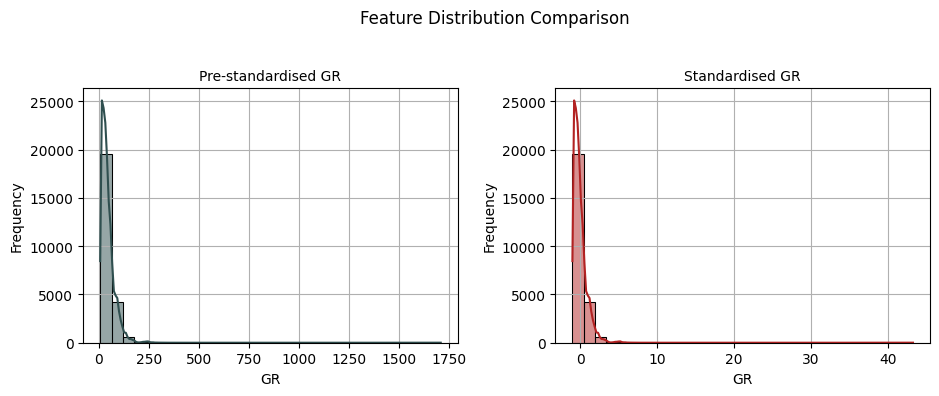

In [6]:
DataProcess.compare_distributions(processed_train_well_data, standardised_train_well_data, 'GR')
# Options: 'BVW', 'KLOGH', 'VSH', 'GR', 'NPHI', 'RHOB', 'RT'

##### II$\,\,\,\,\,\,$Choosing the Optimal Number of Clusters (Elbow Method)

<p>Next, we import the <code>KMeansClustering</code> class from the <code>ClusteringFunctions</code> module and create an instance of it, named <code>KMeans_Clustering</code>. This instance will be used to perform clustering tasks such as fitting the K-Means model, determining optimal cluster numbers, and analysing the results.</p>

In [7]:
from Lib.ClusteringFunctions import KMeansClustering
KMeans_Clustering = KMeansClustering()

<p>The <code>KMeans_Clustering.elbow_method</code> is used to determine the optimal number of clusters for the standardised training dataset (<code>standardised_train_well_data</code>). By varying the number of clusters (<code>k</code>) from 1 to 10, it calculates and plots the <em>inertia</em>, the sum of squared distances to the nearest cluster centroid. The resulting <em>elbow</em> plot helps identify the ideal number of clusters, where the inertia starts to decrease more slowly, indicating a balance between underfitting and overfitting.</p>

k: 1
inertia:  171345.99999999997
k: 2
inertia:  107397.3543206002
k: 3
inertia:  87539.56548987034
k: 4
inertia:  77178.72525190083
k: 5
inertia:  68174.84474616597
k: 6
inertia:  61216.82861749919
k: 7
inertia:  55538.227135491135
k: 8
inertia:  48162.720337156774
k: 9
inertia:  43235.676388633576
k: 10
inertia:  39081.83003522136


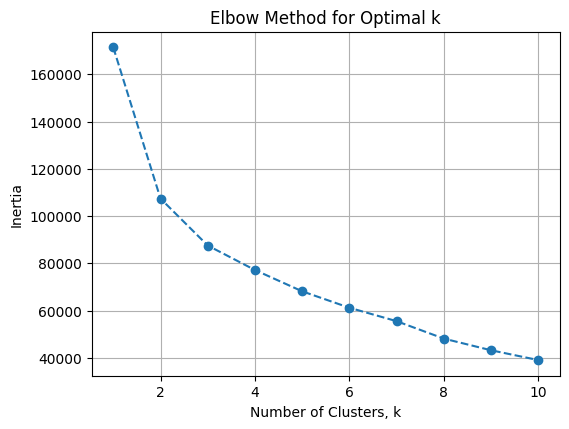

In [8]:
KMeans_Clustering.elbow_method(standardised_train_well_data, max_k=10)

##### III$\,\,\,\,\,\,$Applying K-Means Clustering to Well Log Data

<p>Now that we have standardised our well log data, we can proceed with applying the KMeans clustering algorithm. We will begin by training the model using the standardised training dataset. For this exercise, we specify the number of clusters, <code>n_clusters = 4</code>, based on our previous analysis of the elbow chart.</p>

<p>The <show_stats=True> option will provide us with useful performance metrics, such as the <em>inertia</em> and <em>silhouette score</em>, which help us assess the quality of our clustering.</p>

In [9]:
train_clustered, kmeans_model = KMeans_Clustering.run_kmeans_train(standardised_train_well_data, n_clusters=4, show_stats=True)

K-Means Clustering Results (Training Data) with 4 Clusters
Inertia (Sum of Squared Distances to Centroids): 77178.72525190082
Silhouette Score (Training Data): 0.3067


Next, we use the trained KMeans model to predict the clusters for the first well in our test dataset. This step involves applying the model we trained earlier to a new, unseen dataset, allowing us to evaluate how well the clustering generalises to other wells.

In [10]:
test_clustered_1 = KMeans_Clustering.run_kmeans_test(standardised_test_well_data[0], kmeans_model)

Now that we have assigned clusters to the first test well, we can visualise the results. We’ll plot the clusters on a graph to see how well KMeans has identified the different lithologies in the well. This will create a visual representation of the clusters, making it easier to interpret the results and see how the KMeans algorithm has grouped the data.

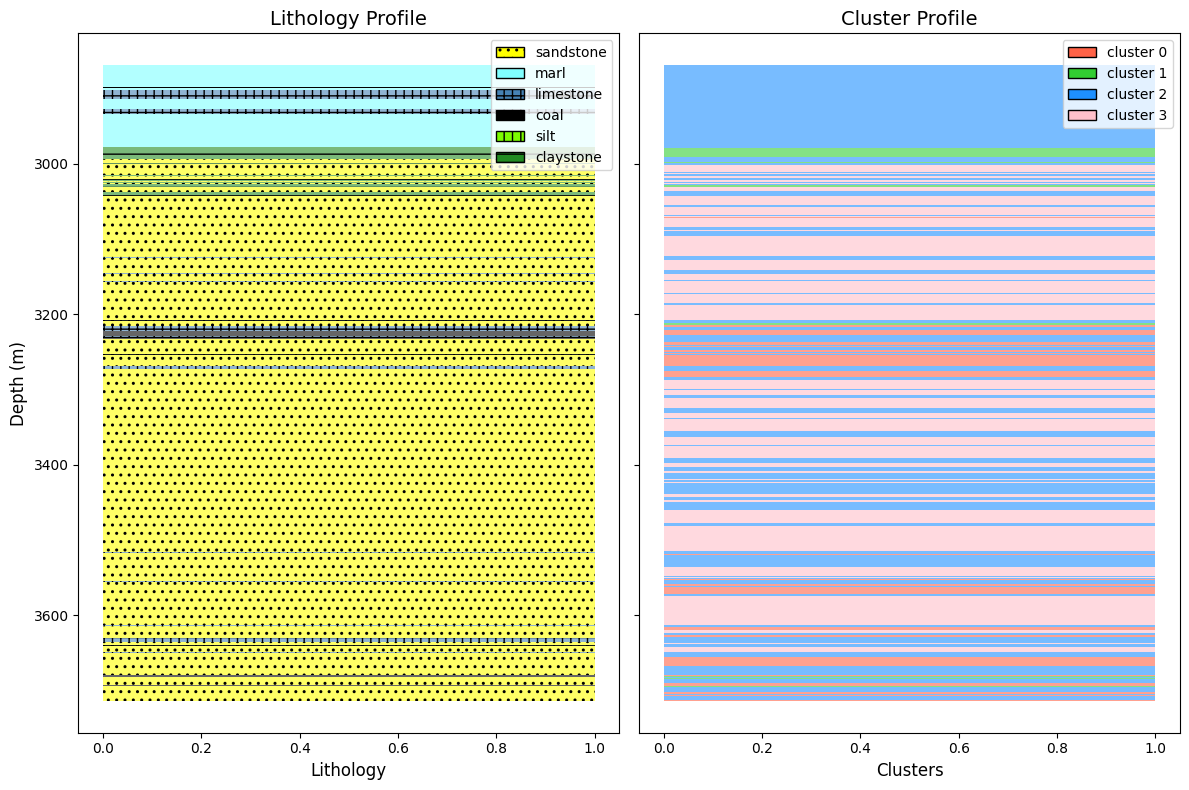

In [11]:
KMeans_Clustering.visualise_lithology_clusters(test_clustered_1)

We can repeat this for the second testing well.

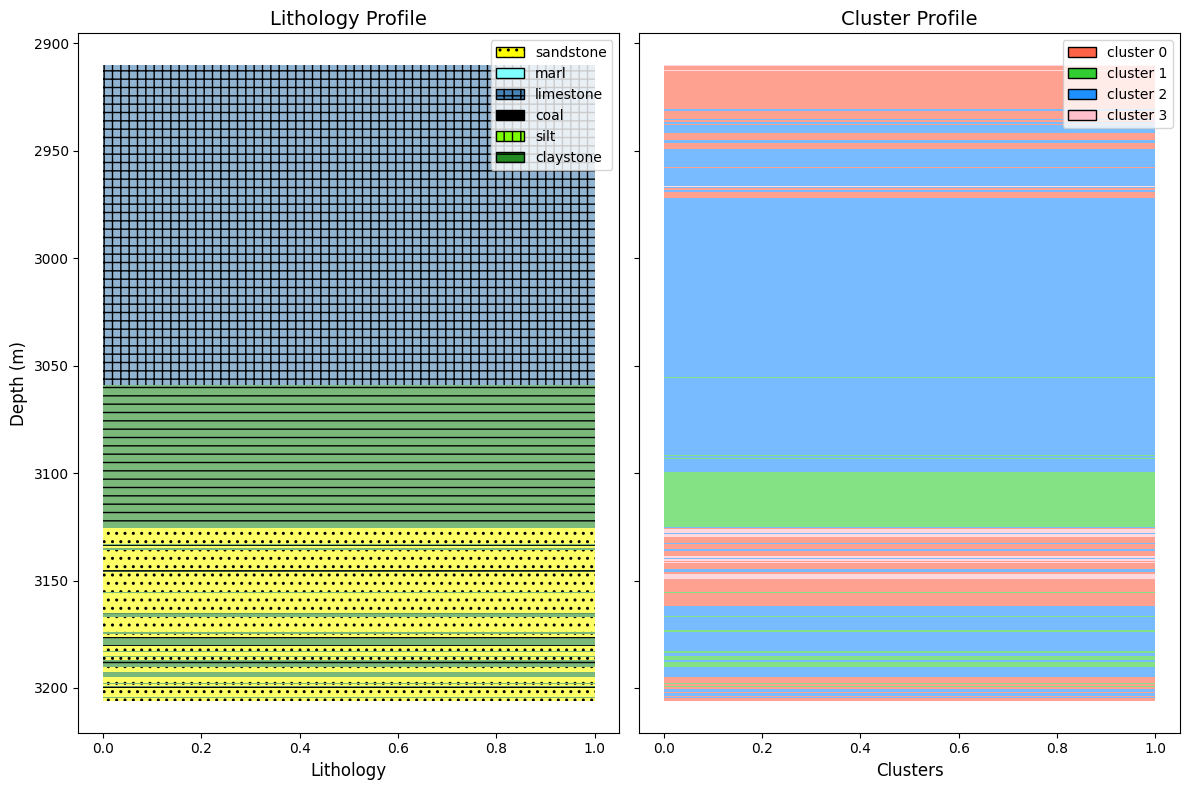

In [12]:
test_clustered_2 = KMeans_Clustering.run_kmeans_test(standardised_test_well_data[1], kmeans_model)
KMeans_Clustering.visualise_lithology_clusters(test_clustered_2)